<a href="https://colab.research.google.com/github/tigju/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [42]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
np.mean(sales)
np.var(sales)
np.std(sales)

428.67360686714756

In [0]:
# function for mean, variance and std without library functions
def mean_var_std(lst):
  summ = 0
  varsum = 0
  for n in lst:
    summ += n
  mymean = summ/len(lst)
  for n in lst:
    varsum += (n - mymean)**2
  myvar = varsum/len(lst)
  mystd = myvar**0.5
  return f"Mean: {mymean}; Variance: {myvar}; Standard Deviation: {mystd}"

In [44]:
mean_var_std(sales)

'Mean: 3052.714285714286; Variance: 183761.06122448976; Standard Deviation: 428.67360686714756'

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [45]:
# covariance between last week sales and number of customers
customers = [127, 80, 105, 92, 120, 115, 93]

np.cov(sales, customers)[0][1]

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [46]:
customer_sales_df = pd.DataFrame({'sales': sales, 'customers': customers})
customer_sales_df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [66]:
sales_std = customer_sales_df['sales'].std(ddof=1)
customers_std = customer_sales_df['customers'].std(ddof=1)

print(sales_std)
print(customers_std)

463.0204150595357
17.057326313123664


In [67]:
covariance_sales_customers = customer_sales_df['sales'].cov(customer_sales_df['customers'])
covariance_sales_customers

7604.357142857142

In [68]:
# calculate denominator
denominator = sales_std * customers_std
denominator

7897.890309308459

In [69]:
# calculate correlation 
correlation_sales_customers = covariance_sales_customers/denominator
correlation_sales_customers

0.9628339778148909

In [70]:
customer_sales_df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [76]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
titanic_df = pd.read_csv(url)
titanic_df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [72]:
titanic_df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [73]:
titanic_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [74]:
titanic_df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

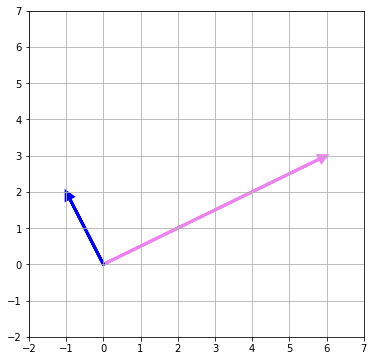

In [100]:
vector_1 = np.array([6, 3])
vector_2 = np.array([-1, 2])

fig, ax = plt.subplots(figsize=(6,6))

ax.grid()

plt.xlim(-2, 7)
plt.ylim(-2, 7)

plt.arrow(0,0, *vector_1, head_width=0.2, head_length=0.2, length_includes_head=True, linewidth=3, color='violet')
plt.arrow(0,0, *vector_2, head_width=0.2, head_length=0.2, length_includes_head=True, linewidth=3, color='blue')

plt.show()

The synonym for orthogonal is perpendicular.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [102]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
np.dot(a,b)

-40

Vectors a and b are not orthogonal. Dot product != 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [115]:
c = np.array([2,-15,6,20])

# norm of a vector squared
c_norm = np.linalg.norm(c)**2
print(c_norm)

# dot product of vector with itself
c_product = np.dot(c,c)
print(c_product)

# transposed vector
cT  = np.array([c]).T

# product of c with its transposed
cT_c = np.matmul(c, c_T)
print(cT_c)


665.0
665
[665]


Quantities have the same result


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$b = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}$$


$$e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}$$


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])

In [117]:
# find vector's length
f_norm = np.linalg.norm(f)
f_norm

19.131126469708992

In [119]:
# find it's unit vector
f_hat = f/np.linalg.norm(f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [121]:
f_hat_norm = np.linalg.norm(f_hat)
print(f"{f_hat_norm:.4f}")

1.0000


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [134]:
# dependent vectors
vect_1 = [-2,5]
vect_2 = np.multiply(vect_1, 2)

print(vect_1, '\n', vect_2)

[-2, 5] 
 [-4 10]


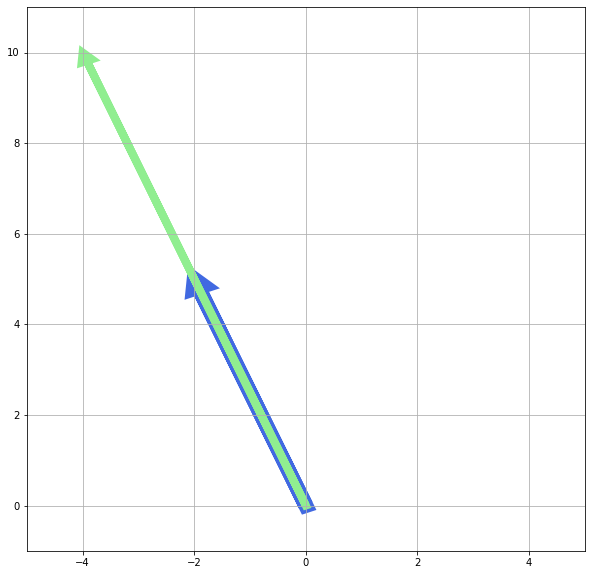

In [138]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-1,11)

for myvect, mycolor, width in [(vect_1, 'royalblue', 15), (vect_2, 'lightgreen', 8)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width,
              length_includes_head=True, 
              color=mycolor)

In [144]:
# independent vectors
vec_1 = np.random.randint(low=-5, high=5, size=2)
vec_2 = np.random.randint(low=-5, high=5, size=2)

print(vec_1, '\n', vec_2)

[-3  1] 
 [1 2]


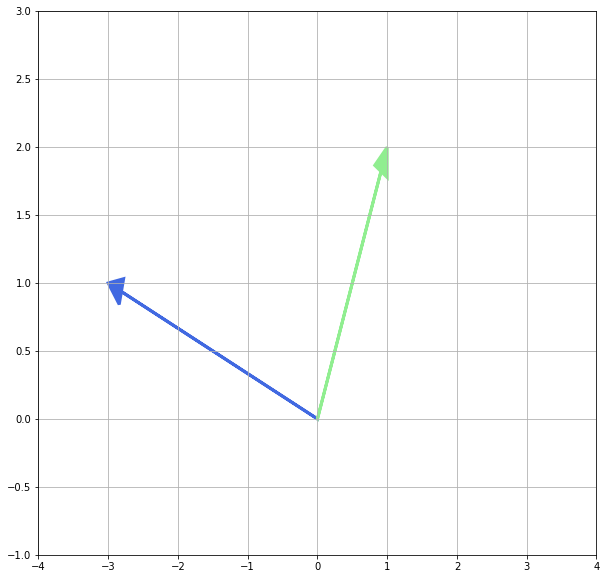

In [154]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid()
plt.xlim(-4,4)          
plt.ylim(-1,3)

for myvect, mycolor, width in [(vec_1, 'royalblue',3), (vec_2, 'lightgreen', 3)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width,
              length_includes_head=True, 
              color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

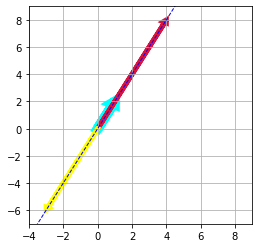

In [209]:
# first find out if the vectors are linearly dependent by plotting them on the graph
g = np.array([1,2])
h = np.array([4,8])

# let's subtract them to create another vector and plot it to see the result
g_h = g - h

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-4,9)          
plt.ylim(-7,9)

plt.plot([-4.5,8.5], [-9,17], '--', color='b', linewidth=1)
for vect, mycolor, width in [(g, 'cyan', 10), (h, 'crimson', 5), (g_h, 'yellow', 5)]:
    plt.arrow(0,0,
              vect[0], 
              vect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width,
              length_includes_head = True, 
              color=mycolor)


'g' and 'h' are linearly dependent vectors, their span is limited to one dimention (one line). Changing the vectors by combining, scaling, using in form of linear combinations, adding to each, subtracting from each other will give the result within one line.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

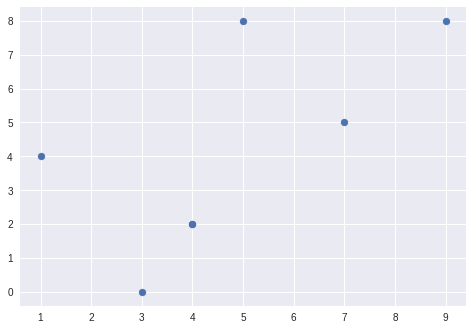

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()